In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = "../data/processed/solar_processed.csv"
df = pd.read_csv(data_path, parse_dates=["time"])

In [3]:
df = df.dropna(subset=["ninja_pv"])  # remove missing rows
df["solar_potential"] = df["ninja_pv"]

In [4]:
grid_size = (10, 10)  # 10x10 possible positions
panel_efficiency = 0.18  # 18%
panel_area = 1.6  # m^2 per panel

In [5]:
# Simulate placement by assigning random efficiency variations
np.random.seed(42)
placement_matrix = np.random.uniform(0.8, 1.0, size=grid_size)

In [6]:
# Calculate average solar potential over time
avg_potential = df["solar_potential"].mean()

In [7]:
# Energy output per panel position
energy_matrix = placement_matrix * avg_potential * panel_efficiency * panel_area

In [8]:
# Find best locations (top 10 positions)
flat_indices = np.argsort(energy_matrix.ravel())[::-1][:10]
best_positions = np.array(np.unravel_index(flat_indices, grid_size)).T

In [9]:
print("🔋 Top 10 panel placement positions (row, col):")
for pos in best_positions:
    print(tuple(pos))


🔋 Top 10 panel placement positions (row, col):
(np.int64(6), np.int64(9))
(np.int64(1), np.int64(1))
(np.int64(5), np.int64(0))
(np.int64(3), np.int64(4))
(np.int64(0), np.int64(1))
(np.int64(3), np.int64(3))
(np.int64(5), np.int64(2))
(np.int64(5), np.int64(5))
(np.int64(4), np.int64(3))
(np.int64(5), np.int64(3))


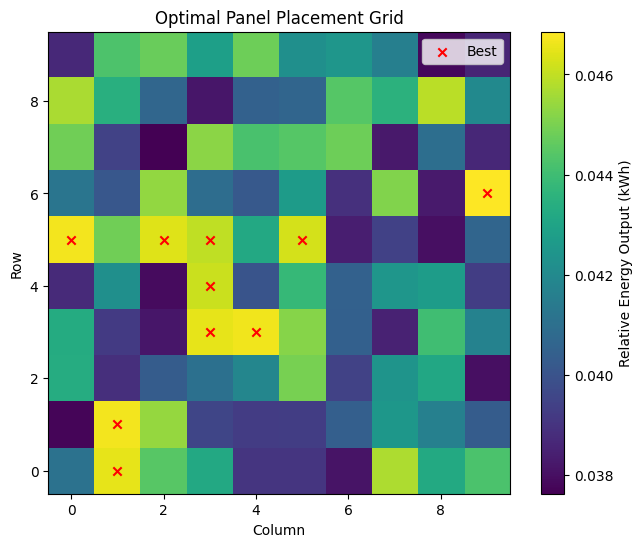

In [10]:
# Visualization
plt.figure(figsize=(8,6))
plt.imshow(energy_matrix, cmap="viridis", origin="lower")
plt.colorbar(label="Relative Energy Output (kWh)")
plt.scatter(best_positions[:,1], best_positions[:,0], c="red", marker="x", label="Best")
plt.title("Optimal Panel Placement Grid")
plt.xlabel("Column")
plt.ylabel("Row")
plt.legend()
plt.savefig("../reports/panel_placement.png", dpi=300)
plt.show()